In [1]:
# 主要包
import numpy as np
import pandas as pd
import datetime
import random

# 绘图
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
import matplotlib as mpl

mpl.rcParams['font.sans-serif']=['SimHei']
mpl.rcParams['axes.unicode_minus'] = False

pd.set_option('display.max_columns', None)

# 忽略浸膏
import warnings
warnings.filterwarnings(action="ignore")
pd.options.display.max_seq_items = 8000
pd.options.display.max_rows = 8000
import os

In [2]:
# 加载数据集
st2 = pd.read_csv('input/sales_train_v2.csv')
shops = pd.read_csv('input/shops.csv')
items = pd.read_csv('input/items.csv')
item_categories = pd.read_csv('input/item_categories.csv')

st2.shape,shops.shape,items.shape,item_categories.shape

((2935849, 6), (60, 2), (22170, 3), (84, 2))

## 2013年1月至2015年10月的每日历史数据

In [3]:
st2.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


## 商店名字和对应ID

In [95]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


## 商品的名字和对应的种类

In [11]:
items.head(12)

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40
5,***НОВЫЕ АМЕРИКАНСКИЕ ГРАФФИТИ (UNI) ...,5,40
6,***УДАР ПО ВОРОТАМ (UNI) D,6,40
7,***УДАР ПО ВОРОТАМ-2 (UNI) D,7,40
8,***ЧАЙ С МУССОЛИНИ D,8,40
9,***ШУГАРЛЭНДСКИЙ ЭКСПРЕСС (UNI) D,9,40


## 商品种类对应的名字

In [7]:
item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [19]:
shops_num = list(set(st2['shop_id']))

## 记录每个商店的总销售额

In [58]:
st2['item_cnt_day'].astype('float')
st2['item_price'].astype('float')
st_demo = st2[st2['shop_id']==shops_num[0]]
all_price = 0.0
dict_x = {}
for i in range(st_demo.shape[0]):
    good = st_demo.iloc[i]
    all_price +=good['item_cnt_day']*good['item_price'] 
    if good['item_id'] not in dict_x:
        dict_x[good['item_id']]=0
    else:
        dict_x[good['item_id']]+=1


In [85]:
xx_ = np.c_[np.array([x for x in dict_x.keys()]),np.array([x for x in dict_x.values()])]
xx_[:10,:]

array([[11059,     4],
       [11347,     1],
       [11061,     0],
       [11064,     0],
       [11065,     8],
       [11077,     1],
       [11080,     0],
       [11081,     0],
       [11083,     0],
       [11093,     0]], dtype=int64)

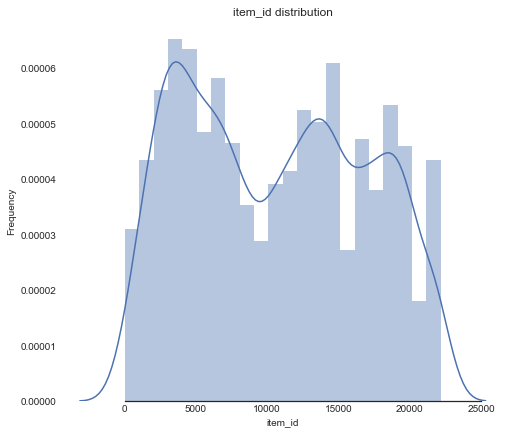

In [90]:
# 设置sns的主题和代码颜色主题
sns.set_style("white")
sns.set_color_codes(palette='deep')
# 开始绘制
f, ax = plt.subplots(figsize=(8, 7))
#显示销售价格出现的频率
sns.distplot(st_demo['item_id'], color="b");
# 不显示网格
ax.xaxis.grid(False)
# 设置坐标轴上的文字
ax.set(ylabel="Frequency")
ax.set(xlabel="item_id")
ax.set(title="item_id distribution")
# 去除那些坐标轴显示线
sns.despine(trim=True, left=True)
plt.show()

In [92]:
all_price

6637370.0

In [93]:
st_price = {}
for j in shops_num:
    st_demo = st2[st2['shop_id']==shops_num[j]]
    all_price = 0.0
    for i in range(st_demo.shape[0]):
        good = st_demo.iloc[i]
        all_price +=good['item_cnt_day']*good['item_price'] 
    st_price[j] = all_price
import matplotlib as mpl
mpl.rcParams['font.sans-serif']=['SimHei']
mpl.rcParams['axes.unicode_minus'] = False

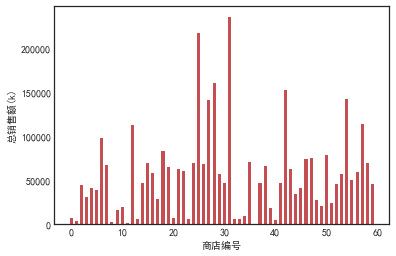

In [118]:
width = 0.6
plt.bar(st_price.keys(), [i/1000 for i in st_price.values()], width, color='r')
plt.ylabel("总销售额(k)")
plt.xlabel("商店编号")
plt.show()

# 必须基于时间序列去做